# Exercises - chapter 5

Load the horse colic data and create a subset that contains the variables 1, 4, and 5. Use this subset for exercises 5.3 - 5.5 and 5.7 - 5.8. Remember to handle missing values and categorical variables correctly.

In [3]:
horse = read.table('horse-colic.data', na='?')
horse = subset(horse, TRUE, c(1,4:5))
#
names(horse) = c('surgery',
                 'rectal_temperature',
                 'pulse')
#
horse$surgery = factor(horse$surgery)
levels(horse$surgery) = c('yes','no')


#### 5.1

How did [Nelson et al. (2017)](http://www.sciencedirect.com/science/article/pii/S1524904216301552) use hypothesis testing in their study?

### " 
The hypothesis was that adolescents who received preoperative training in music-assisted relaxation would experience less pain and anxiety during their first out-of- bed experience following SF surgery than adolescents who did not receive the training. A randomized study design was used to test the hypothesis.
### "

### " 
Independent t-tests for group differ-ences were used to examine pain and anxiety changescores (e.g., the differences between pre-interventionand post-intervention pain and anxiety scores). Pairedstudent t-tests were used to examine paired data (e.g.,the pre-intervention and post-intervention pain andanxiety scores of individual participants).
### "

#### 5.2

How did [Flatt et al. (1990)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC462313/) use hypothesis testing in their study?

### "
...the hypothesis that low selenium concentrations may have a role in the pathogenesis of asthma in New Zealand.
### "

### "
The unpaired Student's t-test was used for between group comparisons, and 95% confidence intervals for the differences between means were also calculated.
### "

#### 5.3

Does the horse colic data provide statistical evidence that the `rectal temperature` of colic horses is not normally distributed?

Explain why your choice of statistical test is appropriate.

Make conclusions about the population.

In [1]:
hist(horse$rectal_temperature, main='Rectal temperature', xlab="")
# """ population seems to be normally distributed (see below), which is sufficient to use a T-statistic-based confidence interval as an estimator of mean. """

# to be sure: the shapiro wilk test is run
shapiro.test(horse$rectal_temperature)

#p-value states to reject the H0 -> data wouldn't be normally distributed

#a graphical q-q plot to help?
library('car')
qqPlot(horse$rectal_temperature)

#points won't fall into the reference line, data seems to be not normally distributed

ERROR: Error in hist(horse$rectal_temperature, main = "Rectal temperature", xlab = ""): object 'horse' not found


#### 5.4

Does the horse colic data provide statistical evidence that the mean `rectal temperature` of the colic horses treated without surgery is not 38 degrees celcius?

Explain why your choice of statistical test is appropriate.

Make conclusions about the population.

In [8]:
#not normal distribution -> choose wilcoxon
# t-test to check about the TRUE MEANS -> wilcoxon about is/is not
# p is < 0,05 -> significant difference and alternative hypothesis
# p-value resembles the likeliness that the samples mean is 38. 0,02 % probability that the temperature is 38
#note that the p-value changes when you set different mu value

wilcox.test(horse$rectal_temperature, mu=38.0)
summary(horse$rectal_temperature)


	Wilcoxon signed rank test with continuity correction

data:  horse$rectal_temperature
V = 14846, p-value = 0.0002233
alternative hypothesis: true location is not equal to 38


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  35.40   37.80   38.20   38.17   38.50   40.80      60 

#### 5.5

Does the horse colic data provide statistical evidence that the mean `rectal temperature` is different between the colic horses treated without surgery and those treated with surgery?

Explain why your choice of statistical test is appropriate.

Make conclusions about the population.

In [20]:
surgered = subset(horse, surgery == 'yes')
surgerless = subset(horse, surgery == 'no')

wilcox.test(surgered$rectal_temperature, surgerless$rectal_temperature)

#not normal distribution -> Wilcoxon
#H0 -> no evidence against 0 hypothesis 
#p > 0,05 -> H0 remains valid
# when n is large enough mean is likely to be normally distriputed -> t.test assumes MEAN to be normally distributed
# if there is no difference 50% change of getting this kind of data, no reason to say there is no evidence against 0


	Wilcoxon rank sum test with continuity correction

data:  surgered$rectal_temperature and surgerless$rectal_temperature
W = 6584.5, p-value = 0.5116
alternative hypothesis: true location shift is not equal to 0


#### 5.6

Does the `Oxytocin` data set in the `BSDA` package provide statistical evidence that blood pressure is lower after receiving oxytocin?

Explain why your choice of statistical test is appropriate.

Make conclusions about the population.


	Shapiro-Wilk normality test

data:  diff
W = 0.94464, p-value = 0.5765



	Paired t-test

data:  Oxytocin$after and Oxytocin$before
t = -8.506, df = 10, p-value = 3.427e-06
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -35.55445
sample estimates:
mean of the differences 
              -45.18182 


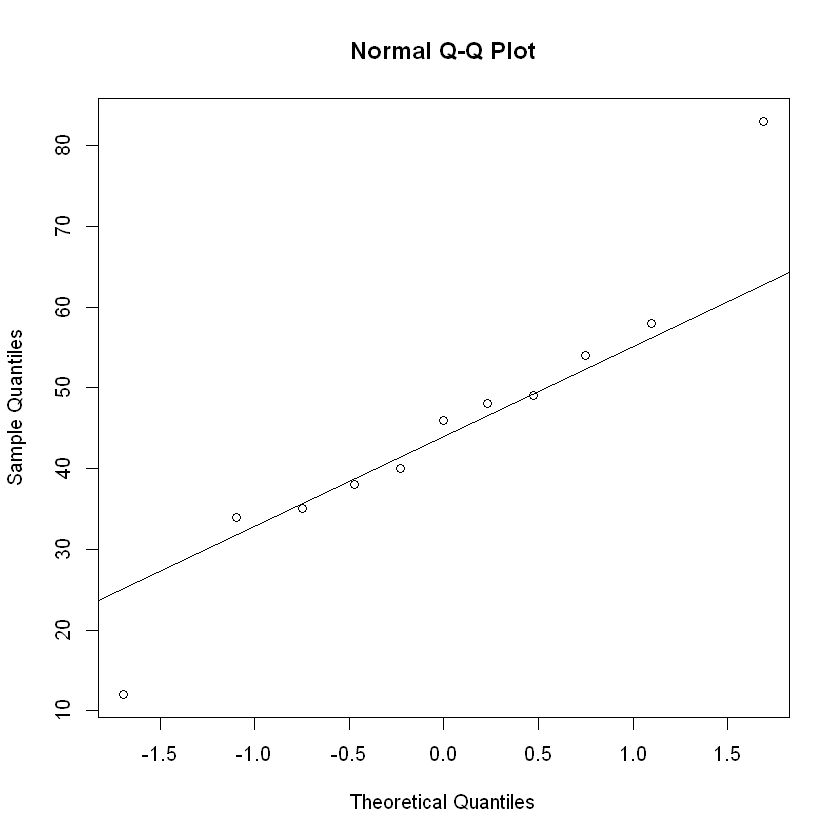

In [10]:
#all of the below was copyed from https://www.rdocumentation.org/packages/BSDA/versions/1.2.0/topics/Oxytocin
#paired t-test is appropriate as the data is normally distributed
# p-value = 6.854e-06 -> reject H0 (no affect to BP) -> H_A: there is an affect to BP
# paired is two observatipons from one unit = before and after measurements

library('BSDA')
diff = Oxytocin$before - Oxytocin$after
qqnorm(diff)
qqline(diff)
shapiro.test(diff)
t.test(Oxytocin$after, Oxytocin$before, paired = TRUE, alternative = 'less')
rm(diff)

#### 5.7

Use a two-sample t-test to assess whether the colic horses treated with surgery and those treated without surgery are different regarding `pulse`.

Make conclusions about the population.

In [27]:
surgered = subset(horse, surgery == 'yes')
surgerless = subset(horse, surgery == 'no')
t.test(surgered$pulse, surgerless$pulse)

#Horses that underwent to surgery had higher pulse compared to those that didn't
#The difference between groups was statistically significance df = 263.34, p-value = 0.001234
#p-value suppports evidence against the H0


	Welch Two Sample t-test

data:  surgered$pulse and surgerless$pulse
t = 3.2664, df = 263.34, p-value = 0.001234
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.326229 17.457445
sample estimates:
mean of x mean of y 
 76.39634  65.50450 


#### 5.8

Use the Mann-Whitney-Wilcoxon test to assess whether the colic horses treated with surgery and those treated without surgery are different regarding `pulse`.

Make conclusions about the population. How do your conclusions differ from those made in the previous question?

In [36]:
surgered = subset(horse, surgery == 'yes')
surgerless = subset(horse, surgery == 'no')
wilcox.test(surgered$pulse, surgerless$pulse)

#no difference to the t-test?
#this is about helocations vs. t-test about the means


	Wilcoxon rank sum test with continuity correction

data:  surgered$pulse and surgerless$pulse
W = 11129, p-value = 0.001713
alternative hypothesis: true location shift is not equal to 0
